# Importing Libraries


In [3]:
from scipy.io import loadmat
from scipy.stats import kurtosis
from scipy.stats import skew
import pandas as pd
import numpy as np
import os
import math
import scipy

## Data Loading

In [4]:
def load_grf(path):
    'Walking through the subjects folders and extracting the features, we want to build up a 10 dataframes, one subject each.'
    subjects = []
    df = pd.DataFrame()
    for root, dirs, files in os.walk(path):
        for dir in sorted(dirs, key=int):
            files.sort()
            for file in sorted(os.listdir(path + dir)):
                if not file.startswith('.') and not file.startswith('S'): # '.' for macOS purposes
                    data = loadmat(path + dir + '/' + file)
                    file_code = file[0:4] # ex: HGRF
                    x = data[file_code] # ex: data['HGRF']
                    file_name = str(file).split('.')[0]
                    df[file_name] = list(x[0]) # x[0] since x is [[]], and I need a list[]
            subjects.append(df)
            df = pd.DataFrame()

    return  subjects



In [5]:
subjects = load_grf('/Users/Admin/Downloads/CLASSIFIED GRF/')

In [6]:
len(subjects)

10

<AxesSubplot:>

<Figure size 1080x432 with 0 Axes>

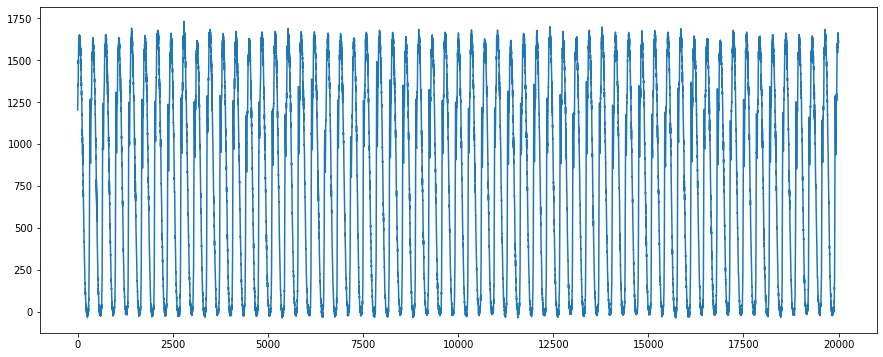

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 6))
plt.figure(figsize=(15, 6))

subjects[9]["VGRF1"].plot()

In [52]:
for i in range(10):
    subjects[i].to_csv(str(i + 1) + '.csv')

## Data Preprocessing

In [8]:
subjects[0].rename(columns = {'HGRF1_1' : 'HGRF1', 'HGRF1_10' : 'HGRF10', 'HGRF1_11' : 'HGRF11',
                              'HGRF1_12' : 'HGRF12', 'HGRF1_2' : 'HGRF2', 'HGRF1_3' : 'HGRF3', 'HGRF1_4' : 'HGRF4', 'HGRF1_5' : 'HGRF5', 'HGRF1_6' : 'HGRF6', 'HGRF1_7' : 'HGRF7', 'HGRF1_8' : 'HGRF8', 'HGRF1_9' : 'HGRF9', 'LGRF1_1' : 'LGRF1', 'LGRF1_10' : 'LGRF10', 'LGRF1_11' : 'LGRF11',
                              'LGRF1_12' : 'LGRF12', 'LGRF1_2' : 'LGRF2', 'LGRF1_3' : 'LGRF3', 'LGRF1_4' : 'LGRF4', 'LGRF1_5' : 'LGRF5', 'LGRF1_6' : 'LGRF6', 'LGRF1_7' : 'LGRF7', 'LGRF1_8' : 'LGRF8', 'LGRF1_9' : 'LGRF9', 'VGRF1_1' : 'VGRF1', 'VGRF1_10' : 'VGRF10', 'VGRF1_11' : 'VGRF11',
                              'VGRF1_12' : 'VGRF12', 'VGRF1_2' : 'VGRF2', 'VGRF1_3' : 'VGRF3', 'VGRF1_4' : 'VGRF4', 'VGRF1_5' : 'VGRF5', 'VGRF1_6' : 'VGRF6', 'VGRF1_7' : 'VGRF7', 'VGRF1_8' : 'VGRF8', 'VGRF1_9' : 'VGRF9',
                              }, inplace = True)

In [9]:
subjects[0]

,HGRF1,HGRF10,HGRF11,HGRF12,HGRF2,HGRF3,HGRF4,HGRF5,HGRF6,HGRF7,...,VGRF11,VGRF12,VGRF2,VGRF3,VGRF4,VGRF5,VGRF6,VGRF7,VGRF8,VGRF9
0,267.067004,24.262398,-18.796121,-22.017007,8.649826,91.024021,216.184825,236.697394,40.177518,-85.090940,...,-4.525205,1488.596635,51.865275,743.751947,1069.345675,1107.593131,147.483915,1265.486475,146.503211,15.579227
1,223.558814,-5.978766,-2.130638,-19.112267,28.482818,117.165091,201.308176,231.539381,70.998495,-105.292515,...,-9.428725,1541.064299,55.297739,788.373979,1050.221947,1077.681659,179.356795,1265.976827,144.051451,12.637115
2,249.680165,25.054810,-1.821012,-29.244973,26.951872,147.128448,220.126197,242.590033,60.960275,-68.854166,...,-8.448021,1548.419579,44.509995,815.833691,1026.685051,1107.593131,154.348843,1285.100555,124.437371,21.463451
3,210.747437,-3.582781,-20.121888,2.192715,28.855111,138.960478,197.983315,190.255184,82.864788,-52.178724,...,-16.784005,1560.188027,57.749499,853.590795,1019.329771,1051.693003,159.252363,1315.012027,110.707515,6.752891
4,246.501528,2.857851,-28.141295,14.586113,2.657623,125.467582,224.377394,220.662091,62.620066,-30.400715,...,-6.976965,1543.025707,40.096827,910.961979,1038.453499,1080.133419,121.004907,1332.664699,106.294347,1.359019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,-47.493242,236.110934,8.345081,2.736100,134.341098,35.294501,141.900574,-26.241766,58.496743,-5.433240,...,41.567883,-2.073445,952.641899,1705.332219,1161.531851,-0.112037,134.244411,-2.073445,-13.841893,1738.185803
19997,-27.311187,219.331046,-21.661225,9.340134,140.634337,74.776393,189.076239,-35.922333,55.385852,13.378731,...,28.818731,-1.092741,968.333163,1767.606923,1203.211771,5.281835,152.387435,-0.602389,-14.332245,1683.756731
19998,-14.370966,205.813352,-25.656874,-1.151394,121.912171,44.795856,138.616321,-32.300147,64.527015,28.611663,...,13.617819,-8.448021,997.263931,1746.031435,1147.311643,33.722251,140.618987,11.166059,2.339723,1751.915659
19999,8.754869,179.318538,-12.247334,-6.998545,110.758444,64.628848,226.311879,-52.695971,69.259829,11.724990,...,7.733595,-1.092741,1002.657803,1749.463899,1193.895083,1.359019,147.974267,7.733595,-16.293653,1726.417355


### Statistical Study & Combining Subjects

In [10]:
def rms_calculation(values):
    'calculates the root mean square (RMS) of a given set of values.'
    return np.sqrt(sum(values**2)/len(values))

In [11]:
def combine_subjects(subjects):
    'Combining all the subjects into one dataframe where we calculate the statistical measures for each feature, such as mean, std, rms, skewness, kurtosis, iqr, mad, max, zcc, range.'
    stats_vals = []
    all_vals = {}
    for s in range(10): # 10 subjects
        for i in range(0, 12): # 12 studies
                    mean = subjects[s]["VGRF" + str(i + 1)].mean()
                    all_vals["VGRF_mean"] = mean
                    std = subjects[s]["VGRF" + str(i + 1)].std()
                    all_vals["VGRF_std"] = std
                    rms = rms_calculation(subjects[s]["VGRF" + str(i + 1)])
                    all_vals["VGRF_rms"] = rms
                    skewness = skew(subjects[s]["VGRF" + str(i + 1)], axis=0)
                    all_vals["VGRF_skewness"] = skewness
                    kurt = kurtosis(subjects[s]["VGRF" + str(i + 1)], axis=0)
                    all_vals["VGRF_kurtosis"] = kurt
                    iqr = subjects[s]["VGRF" + str(i + 1)].quantile(0.75) - subjects[s]["VGRF" + str(i + 1)].quantile(0.25)
                    all_vals["VGRF_iqr"] = iqr
                    mad = subjects[s]["VGRF" + str(i + 1)].mad()
                    all_vals["VGRF_mad"] = mad
                    max = subjects[s]["VGRF" + str(i + 1)].max()
                    all_vals["VGRF_max"] = max
                    zcc = len(np.where(np.diff(np.sign(subjects[s]["VGRF" + str(i + 1)].values)))[0])
                    all_vals["VGRF_zcc"] = zcc
                    rang = max - subjects[s]["VGRF" + str(i + 1)].min()
                    all_vals["VGRF_range"] = rang


                    mean = subjects[s]["HGRF" + str(i + 1)].mean()
                    all_vals["HGRF_mean"] = mean
                    std = subjects[s]["HGRF" + str(i + 1)].std()
                    all_vals["HGRF_std"] = std
                    rms = rms_calculation(subjects[s]["HGRF" + str(i + 1)])
                    all_vals["HGRF_rms"] = rms
                    skewness = skew(subjects[s]["HGRF" + str(i + 1)], axis=0)
                    all_vals["HGRF_skewness"] = skewness
                    kurt = kurtosis(subjects[s]["HGRF" + str(i + 1)], axis=0)
                    all_vals["HGRF_kurtosis"] = kurt
                    iqr = subjects[s]["HGRF" + str(i + 1)].quantile(0.75) - subjects[s]["HGRF" + str(i + 1)].quantile(0.25)
                    all_vals["HGRF_iqr"] = iqr
                    mad = subjects[s]["HGRF" + str(i + 1)].mad()
                    all_vals["HGRF_mad"] = mad
                    max = subjects[s]["HGRF" + str(i + 1)].max()
                    all_vals["HGRF_max"] = max
                    zcc = len(np.where(np.diff(np.sign(subjects[s]["HGRF" + str(i + 1)].values)))[0])
                    all_vals["HGRF_zcc"] = zcc
                    rang = max - subjects[s]["HGRF" + str(i + 1)].min()
                    all_vals["HGRF_range"] = rang


                    mean = subjects[s]["LGRF" + str(i + 1)].mean()
                    all_vals["LGRF_mean"] = mean
                    std = subjects[s]["LGRF" + str(i + 1)].std()
                    all_vals["LGRF_std"] = std
                    rms = rms_calculation(subjects[s]["LGRF" + str(i + 1)])
                    all_vals["LGRF_rms"] = rms
                    skewness = skew(subjects[s]["LGRF" + str(i + 1)], axis=0)
                    all_vals["LGRF_skewness"] = skewness
                    kurt = kurtosis(subjects[s]["LGRF" + str(i + 1)], axis=0)
                    all_vals["LGRF_kurtosis"] = kurt
                    iqr = subjects[s]["LGRF" + str(i + 1)].quantile(0.75) - subjects[s]["LGRF" + str(i + 1)].quantile(0.25)
                    all_vals["LGRF_iqr"] = iqr
                    mad = subjects[s]["LGRF" + str(i + 1)].mad()
                    all_vals["LGRF_mad"] = mad
                    max = subjects[s]["LGRF" + str(i + 1)].max()
                    all_vals["LGRF_max"] = max
                    zcc = len(np.where(np.diff(np.sign(subjects[s]["LGRF" + str(i + 1)].values)))[0])
                    all_vals["LGRF_zcc"] = zcc
                    rang = max - subjects[s]["LGRF" + str(i + 1)].min()
                    all_vals["LGRF_range"] = rang

                    stats_vals.insert(len(stats_vals), all_vals)

                    all_vals = {}

    return  stats_vals

In [12]:
vals = combine_subjects(subjects)
vals

[{'VGRF_mean': 795.9425759717514,
  'VGRF_std': 669.0113034355262,
  'VGRF_rms': 1039.749167194542,
  'VGRF_skewness': 0.1437905685111908,
  'VGRF_kurtosis': -1.504290823084816,
  'VGRF_iqr': 1339.6416640000002,
  'VGRF_mad': 608.4591356423773,
  'VGRF_max': 1970.6126510000001,
  'VGRF_zcc': 1202,
  'VGRF_range': 2008.972144,
  'HGRF_mean': 65.12169798340426,
  'HGRF_std': 93.44147694265169,
  'HGRF_rms': 113.89340901831117,
  'HGRF_skewness': 0.25737352114716716,
  'HGRF_kurtosis': -0.9538133597376426,
  'HGRF_iqr': 150.779552448,
  'HGRF_mad': 80.21011116363869,
  'HGRF_max': 298.5378798958,
  'HGRF_zcc': 1816,
  'HGRF_range': 454.6922825952,
  'LGRF_mean': -6.515891872101395,
  'LGRF_std': 40.01063411827836,
  'LGRF_rms': 40.536744453587616,
  'LGRF_skewness': -0.6122604667079503,
  'LGRF_kurtosis': 0.24792503176621494,
  'LGRF_iqr': 43.58444970000001,
  'LGRF_mad': 30.53122043143732,
  'LGRF_max': 120.3482268,
  'LGRF_zcc': 3084,
  'LGRF_range': 275.9634567},
 {'VGRF_mean': 787.607

In [13]:
final_result = pd.DataFrame(vals)
final_result

,VGRF_mean,VGRF_std,VGRF_rms,VGRF_skewness,VGRF_kurtosis,VGRF_iqr,VGRF_mad,VGRF_max,VGRF_zcc,VGRF_range,...,LGRF_mean,LGRF_std,LGRF_rms,LGRF_skewness,LGRF_kurtosis,LGRF_iqr,LGRF_mad,LGRF_max,LGRF_zcc,LGRF_range
0,795.942576,669.011303,1039.749167,0.143791,-1.504291,1339.641664,608.459136,1970.612651,1202,2008.972144,...,-6.515892,40.010634,40.536744,-0.612260,0.247925,43.584450,30.531220,120.348227,3084,275.963457
1,787.607842,645.828014,1018.527900,0.096512,-1.509898,1294.529280,587.320108,1891.175627,1122,1931.496528,...,-6.117066,41.365408,41.814231,-0.604518,0.200198,46.368714,31.764184,111.459998,2937,289.135170
2,790.698695,640.884049,1017.799713,0.096970,-1.479213,1284.722240,578.894734,1925.009915,1134,1968.763280,...,-4.490360,40.540020,40.786939,-0.470620,0.652723,45.619105,30.877677,146.798741,2839,379.837944
3,783.775173,642.724195,1013.596201,0.093747,-1.512248,1295.019632,583.624408,1895.098443,1108,1940.813216,...,0.371199,40.340369,40.341069,-0.160122,0.390837,46.047453,30.711734,143.371953,2999,312.373071
4,786.725253,663.543809,1029.176854,0.155248,-1.500050,1335.718848,602.124780,1933.345899,1464,1976.118560,...,-0.615291,39.737477,39.741247,-0.320663,0.085935,44.334059,30.477478,116.600178,2913,254.653124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,738.541605,614.452964,960.717060,0.043273,-1.621054,1278.838016,568.290962,1707.783979,1334,1753.989104,...,-1.527312,50.525890,50.547706,-0.105624,2.551240,38.979704,34.462067,256.027582,3617,485.425824
116,739.665190,602.402027,953.925915,0.021734,-1.622597,1255.301120,556.902070,1728.869115,1314,1769.680368,...,-6.990103,52.055723,52.521657,-0.208489,2.744041,39.193879,35.595802,300.468729,3515,542.181987
117,738.927664,610.902466,958.747754,0.035372,-1.626266,1278.838016,565.347914,1716.610315,1282,1765.757552,...,0.734126,49.562297,49.566494,-0.179396,2.143159,40.050575,34.404035,242.534608,3549,466.685582
118,734.749461,612.591298,956.611785,0.043947,-1.630091,1279.818720,567.418611,1731.320875,1198,1778.506704,...,-2.035800,50.571644,50.611341,-0.039244,2.505923,41.014359,34.741118,281.085964,3464,510.484206


In [14]:
df_s1_stat = final_result[0:12]
df_s2_stat = final_result[12:24]
df_s3_stat = final_result[24:36]
df_s4_stat = final_result[36:48]
df_s5_stat = final_result[48:60]
df_s6_stat = final_result[60:72]
df_s7_stat = final_result[72:84]
df_s8_stat = final_result[84:96]
df_s9_stat = final_result[96:108]
df_s10_stat = final_result[108:120]

subjects_stat_measures = [df_s1_stat, df_s2_stat, df_s3_stat, df_s4_stat, df_s5_stat, df_s6_stat, df_s7_stat, df_s8_stat,df_s9_stat, df_s10_stat]

<AxesSubplot:>

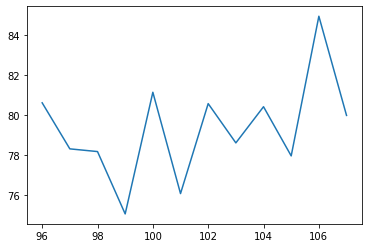

In [15]:
df_s9_stat["HGRF_std"].plot()

In [16]:
df_s5_stat.corr()

,VGRF_mean,VGRF_std,VGRF_rms,VGRF_skewness,VGRF_kurtosis,VGRF_iqr,VGRF_mad,VGRF_max,VGRF_zcc,VGRF_range,...,LGRF_mean,LGRF_std,LGRF_rms,LGRF_skewness,LGRF_kurtosis,LGRF_iqr,LGRF_mad,LGRF_max,LGRF_zcc,LGRF_range
VGRF_mean,1.000000,0.695688,0.791326,0.607967,0.583667,0.684412,0.694468,0.519616,0.121595,0.508865,...,0.601419,-0.825407,-0.826724,0.736473,0.713558,-0.890394,-0.854852,-0.340082,0.899891,-0.488605
VGRF_std,0.695688,1.000000,0.989669,0.989199,0.888500,0.982341,0.998956,0.925190,0.581544,0.919848,...,0.715439,-0.887104,-0.890924,0.729391,0.817284,-0.893848,-0.918057,-0.401312,0.798731,-0.652006
VGRF_rms,0.791326,0.989669,1.000000,0.963020,0.873971,0.971527,0.988497,0.890976,0.520882,0.884215,...,0.732550,-0.919743,-0.923407,0.769139,0.836219,-0.937405,-0.951748,-0.412349,0.857705,-0.651116
VGRF_skewness,0.607967,0.989199,0.963020,1.000000,0.920152,0.960447,0.984306,0.944965,0.584179,0.940515,...,0.697927,-0.869847,-0.873353,0.665698,0.780391,-0.834591,-0.892070,-0.401581,0.732675,-0.666220
VGRF_kurtosis,0.583667,0.888500,0.873971,0.920152,1.000000,0.792583,0.868074,0.893265,0.427657,0.888080,...,0.670621,-0.890382,-0.892184,0.611006,0.681950,-0.730881,-0.882865,-0.456515,0.683606,-0.620104
VGRF_iqr,0.684412,0.982341,0.971527,0.960447,0.792583,1.000000,0.988134,0.885493,0.607174,0.880393,...,0.683158,-0.826771,-0.830985,0.713908,0.827369,-0.900857,-0.871436,-0.335696,0.781942,-0.631970
VGRF_mad,0.694468,0.998956,0.988497,0.984306,0.868074,0.988134,1.000000,0.918874,0.594756,0.913511,...,0.716847,-0.874851,-0.879097,0.733154,0.816545,-0.896616,-0.908926,-0.397030,0.796772,-0.645355
VGRF_max,0.519616,0.925190,0.890976,0.944965,0.893265,0.885493,0.918874,1.000000,0.612241,0.999650,...,0.570174,-0.794783,-0.795196,0.592543,0.786055,-0.788796,-0.821001,-0.302681,0.696420,-0.503390
VGRF_zcc,0.121595,0.581544,0.520882,0.584179,0.427657,0.607174,0.594756,0.612241,1.000000,0.615907,...,0.372218,-0.212718,-0.221595,0.372160,0.410852,-0.424068,-0.266819,-0.208885,0.144937,-0.122382
VGRF_range,0.508865,0.919848,0.884215,0.940515,0.888080,0.880393,0.913511,0.999650,0.615907,1.000000,...,0.555005,-0.784058,-0.784167,0.587339,0.783780,-0.782577,-0.811083,-0.292135,0.690692,-0.494560


In [17]:
def fatigue_level_labeling(subjects_stats):
    'Labeling the Fatigue Levels by choosing specific records for each. Records 1,2: level 1, records 5,6: level 2, records 9,10: level 3.'
    labeled_subjects = []
    for i in range(10):
        s = subjects_stats[i]
        s.reset_index(inplace=True, drop = True)
        temp = pd.concat([s.loc[1:2], s.loc[5:6], s.loc[9:10]], axis='rows')
        temp.loc[1:2, 'fatigue_level'] = '1'
        temp.loc[5:6, 'fatigue_level'] = '2'
        temp.loc[9:10, 'fatigue_level'] = '3'
        temp.reset_index(inplace=True, drop = True)
        labeled_subjects.insert(len(labeled_subjects), temp)

    return labeled_subjects



In [18]:
labeled_subjects = fatigue_level_labeling(subjects_stat_measures)
labeled_subjects[0]

,VGRF_mean,VGRF_std,VGRF_rms,VGRF_skewness,VGRF_kurtosis,VGRF_iqr,VGRF_mad,VGRF_max,VGRF_zcc,VGRF_range,...,LGRF_std,LGRF_rms,LGRF_skewness,LGRF_kurtosis,LGRF_iqr,LGRF_mad,LGRF_max,LGRF_zcc,LGRF_range,fatigue_level
0,787.607842,645.828014,1018.527900,0.096512,-1.509898,1294.529280,587.320108,1891.175627,1122,1931.496528,...,41.365408,41.814231,-0.604518,0.200198,46.368714,31.764184,111.459998,2937,289.135170,1
1,790.698695,640.884049,1017.799713,0.096970,-1.479213,1284.722240,578.894734,1925.009915,1134,1968.763280,...,40.540020,40.786939,-0.470620,0.652723,45.619105,30.877677,146.798741,2839,379.837944,1
2,778.719970,636.034386,1005.447316,0.088462,-1.509674,1285.212592,576.992209,1847.534299,1180,1886.874496,...,39.848076,40.042087,-0.069671,0.198447,48.082108,30.804643,134.590811,2957,296.310006,2
3,776.034520,643.637961,1008.205678,0.107506,-1.513287,1294.529280,584.839639,1836.256203,998,1881.480624,...,38.839400,39.153314,0.010362,0.409081,47.653760,30.007655,130.628588,2919,283.459554,2
4,775.717572,643.929886,1008.148163,0.104941,-1.515772,1302.865264,585.321620,1874.994011,1290,1929.044768,...,39.463031,40.032160,0.158760,0.048636,50.545111,31.060574,142.408169,2981,273.607541,3
5,773.079243,648.914341,1009.316741,0.122295,-1.515695,1314.633712,589.541286,1878.426475,1189,1921.199136,...,38.783075,38.782331,-0.136003,-0.025553,45.940366,30.085722,127.737237,2919,257.223214,3


## Feature Selection

In [19]:
# Combining all the subjects after labeling

all_labeled_subjects = pd.concat(labeled_subjects)
all_labeled_subjects.reset_index(inplace=True, drop = True)
all_labeled_subjects

,VGRF_mean,VGRF_std,VGRF_rms,VGRF_skewness,VGRF_kurtosis,VGRF_iqr,VGRF_mad,VGRF_max,VGRF_zcc,VGRF_range,...,LGRF_std,LGRF_rms,LGRF_skewness,LGRF_kurtosis,LGRF_iqr,LGRF_mad,LGRF_max,LGRF_zcc,LGRF_range,fatigue_level
0,787.607842,645.828014,1018.527900,0.096512,-1.509898,1294.529280,587.320108,1891.175627,1122,1931.496528,...,41.365408,41.814231,-0.604518,0.200198,46.368714,31.764184,111.459998,2937,289.135170,1
1,790.698695,640.884049,1017.799713,0.096970,-1.479213,1284.722240,578.894734,1925.009915,1134,1968.763280,...,40.540020,40.786939,-0.470620,0.652723,45.619105,30.877677,146.798741,2839,379.837944,1
2,778.719970,636.034386,1005.447316,0.088462,-1.509674,1285.212592,576.992209,1847.534299,1180,1886.874496,...,39.848076,40.042087,-0.069671,0.198447,48.082108,30.804643,134.590811,2957,296.310006,2
3,776.034520,643.637961,1008.205678,0.107506,-1.513287,1294.529280,584.839639,1836.256203,998,1881.480624,...,38.839400,39.153314,0.010362,0.409081,47.653760,30.007655,130.628588,2919,283.459554,2
4,775.717572,643.929886,1008.148163,0.104941,-1.515772,1302.865264,585.321620,1874.994011,1290,1929.044768,...,39.463031,40.032160,0.158760,0.048636,50.545111,31.060574,142.408169,2981,273.607541,3
5,773.079243,648.914341,1009.316741,0.122295,-1.515695,1314.633712,589.541286,1878.426475,1189,1921.199136,...,38.783075,38.782331,-0.136003,-0.025553,45.940366,30.085722,127.737237,2919,257.223214,3
6,614.550655,445.638395,759.115378,-0.077600,-1.461913,895.382752,399.149999,1367.970043,896,1403.387424,...,29.997903,32.204276,-0.330308,1.198710,33.518262,22.486341,127.201801,3545,251.761772,1
7,613.656690,440.498500,755.383188,-0.098002,-1.464891,882.143248,393.946724,1321.876955,906,1362.688208,...,31.847668,33.506197,-0.341010,1.119841,36.302527,24.018095,139.409731,3270,280.246941,1
8,610.146411,475.873068,773.771605,-0.003038,-1.537215,975.310128,431.594019,1428.773691,1128,1466.642832,...,29.864644,31.266199,-0.630297,1.093403,35.017482,22.823050,121.847446,3472,299.522619,2
9,601.637758,464.937664,760.344800,-0.001820,-1.530153,945.889008,421.616937,1339.529627,1014,1378.869824,...,27.679771,28.404102,-0.555982,0.859392,33.518262,21.269569,105.998555,3445,235.912881,2


### Meathod 1: Feature Importance

In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X = all_labeled_subjects.drop(columns=['fatigue_level'])
y = all_labeled_subjects['fatigue_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

feature_names = list(X.columns)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [27]:
import time
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 7.548 seconds


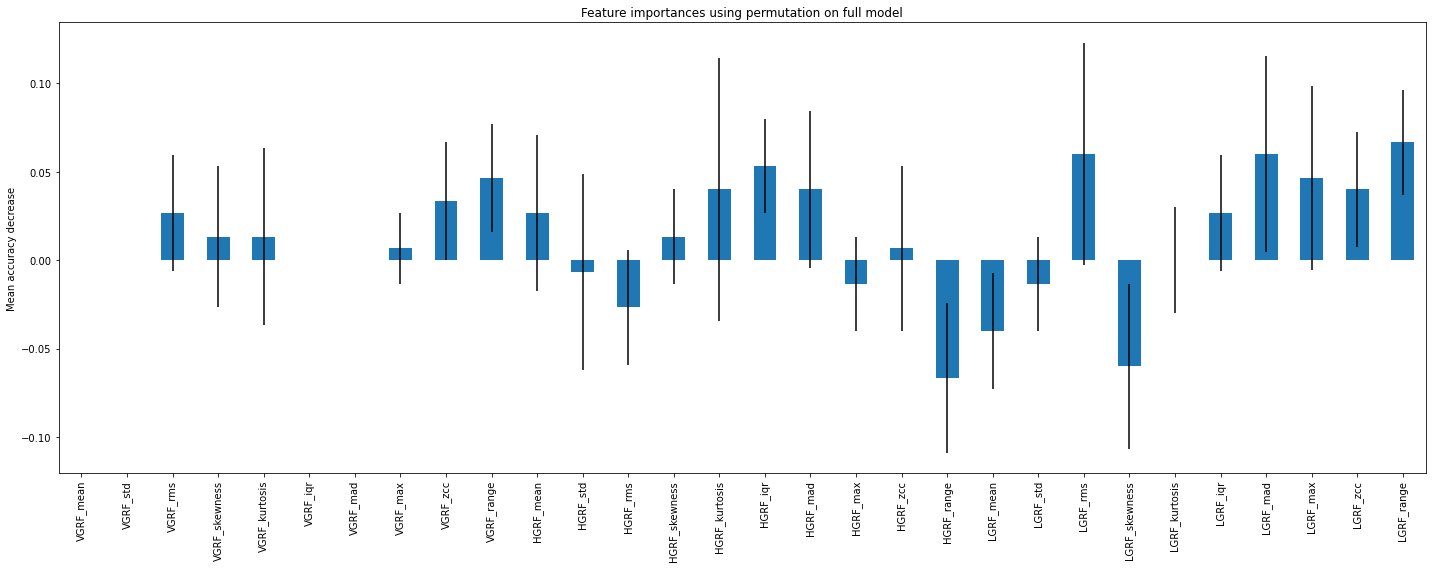

In [28]:
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (20,8)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Meathod 2: Recursive Feature Elimination

In [29]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

X = all_labeled_subjects.drop(columns=['fatigue_level'])
y = all_labeled_subjects['fatigue_level']
estimator = SVR(kernel="linear")

selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_
selector.ranking_

array([ 6,  8,  7,  1,  1, 16, 20, 17, 24, 18, 12, 26,  2,  1,  5, 10,  1,
       23, 22, 19, 11, 13,  4,  9,  1, 14,  3, 21, 25, 15])

In [30]:
selector.support_

array([False, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False])

In [31]:
finalized_data = all_labeled_subjects[['VGRF_skewness', 'VGRF_kurtosis', 'HGRF_skewness', 'HGRF_mad', 'LGRF_kurtosis', 'fatigue_level']]

finalized_data.head(10)

,VGRF_skewness,VGRF_kurtosis,HGRF_skewness,HGRF_mad,LGRF_kurtosis,fatigue_level
0,0.096512,-1.509898,0.219980,76.941052,0.200198,1
1,0.096970,-1.479213,0.199447,78.037174,0.652723,1
2,0.088462,-1.509674,0.176771,76.919766,0.198447,2
3,0.107506,-1.513287,0.145304,76.935311,0.409081,2
4,0.104941,-1.515772,0.191251,76.160568,0.048636,3
5,0.122295,-1.515695,0.267107,78.037649,-0.025553,3
6,-0.077600,-1.461913,-0.044657,64.339846,1.198710,1
7,-0.098002,-1.464891,-0.024451,62.531563,1.119841,1
8,-0.003038,-1.537215,0.033788,63.384636,1.093403,2
9,-0.001820,-1.530153,-0.000630,61.312727,0.859392,2


In [32]:
finalized_data.to_csv("finalized_labeled_data.csv")

In [128]:
final_result.to_csv("all_subjects_stats.csv")